In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [31]:
# Load the Titanic dataset
train = pd.read_csv('/kaggle/input/titanic-classification-in-data-science/train.csv')

In [32]:
# Define the impute_age function
def impute_age(row):
    age = row['Age']
    pclass = row['Pclass']
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [33]:
# Handle missing values for 'Age' based on 'Pclass'
train['Age'] = train.apply(lambda row: impute_age(row[['Age', 'Pclass']]), axis=1)

In [34]:
# Fill missing values in 'Embarked' with 'S'
train['Embarked'] = train['Embarked'].fillna('S')

In [35]:
# Drop the 'Cabin' column
train.drop('Cabin', axis=1, inplace=True)

In [36]:
# Convert categorical variables to dummy/indicator variables
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [37]:
# Drop unnecessary columns
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [38]:
# Concatenate the dummy variables
train = pd.concat([train, sex, embark], axis=1)

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size=0.10, random_state=101)

In [40]:
# Train a logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Make predictions
predictions = logmodel.predict(X_test)

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [43]:
# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8
Precision: 0.8181818181818182
Recall: 0.6923076923076923
F1 Score: 0.7500000000000001


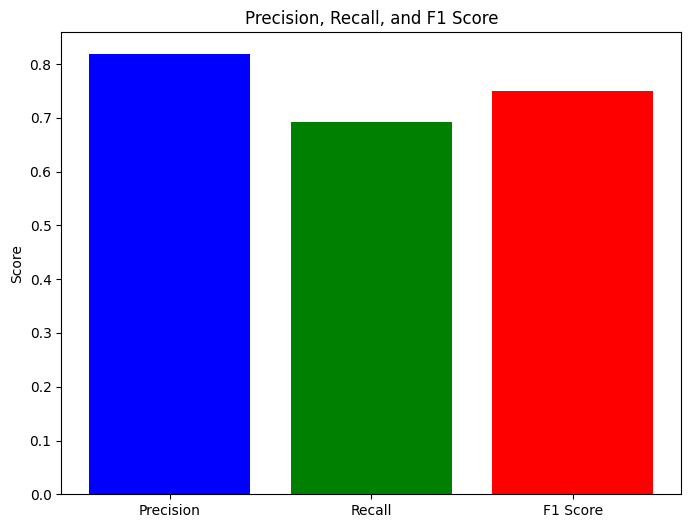

In [44]:
metrics = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(8, 6))
plt.bar(labels, metrics, color=['blue', 'green', 'red'])
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score')
plt.show()

In [45]:
# Confusion Matrix and Classification Report
confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[45  6]
 [12 27]]


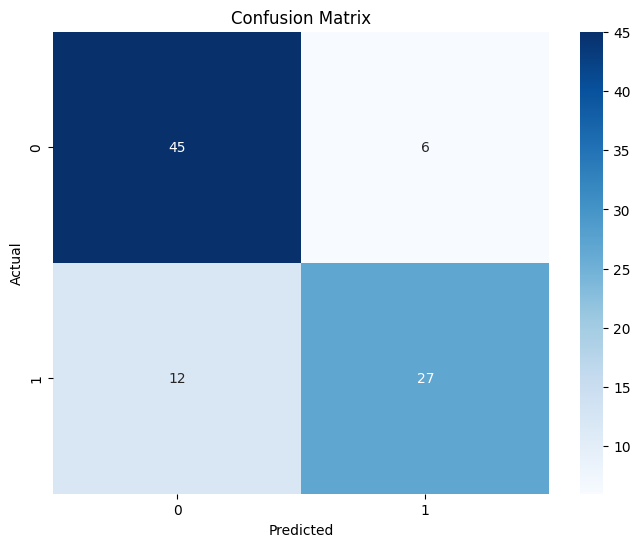

In [46]:
confusion_mat = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
report = classification_report(y_test, predictions, target_names=['Did not survive', 'Survived'])
print("Classification Report:")
print(report)

Classification Report:
                 precision    recall  f1-score   support

Did not survive       0.79      0.88      0.83        51
       Survived       0.82      0.69      0.75        39

       accuracy                           0.80        90
      macro avg       0.80      0.79      0.79        90
   weighted avg       0.80      0.80      0.80        90

